In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [23]:
PIT = pd.read_csv("../src/cleaned_PIT_df.csv").drop(['Unnamed: 0', 'CoC Number', 'CoC Name','state', 'Overall Homeless',                                          
'Sheltered ES Homeless',                                      
'Sheltered TH Homeless',                                  
'Sheltered SH Homeless',                                      
'Sheltered Total Homeless',                                  
'Unsheltered Homeless', 'Overall Homeless Individuals'], axis=1)
PIT.columns

Index(['Overall Homeless - Under 18', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Overall Homeless - Female',
       'Overall Homeless - Male', 'Overall Homeless - Transgender',
       'Overall Homeless - Non-Hispanic/Non-Latino',
       'Overall Homeless - Hispanic/Latino', 'Overall Homeless - White',
       'Overall Homeless - Black or African American',
       ...
       'Sheltered TH Homeless Parenting Youth Age 18-24',
       'Sheltered Total Homeless Parenting Youth Age 18-24',
       'Unsheltered Homeless Parenting Youth Age 18-24',
       'Overall Homeless Children of Parenting Youth',
       'Sheltered ES Homeless Children of Parenting Youth',
       'Sheltered TH Homeless Children of Parenting Youth',
       'Sheltered Total Homeless Children of Parenting Youth',
       'Unsheltered Homeless Children of Parenting Youth', 'year',
       'unsheltered rate'],
      dtype='object', length=376)

In [3]:
#df = PIT.drop(['Unnamed: 0', 'CoC Number', 'CoC Name'],axis=1)

In [24]:
X = np.array(PIT.drop('unsheltered rate',axis=1))
y = np.array(PIT['unsheltered rate'])

In [17]:
X

array([[1.208e+03, 2.580e+02, 1.280e+02, ..., 1.600e+01, 0.000e+00,
        2.015e+03],
       [7.480e+02, 1.530e+02, 6.900e+01, ..., 5.000e+00, 0.000e+00,
        2.015e+03],
       [1.153e+03, 1.810e+02, 8.900e+01, ..., 1.300e+01, 0.000e+00,
        2.015e+03],
       ...,
       [2.940e+02, 3.100e+01, 2.000e+01, ..., 4.000e+00, 0.000e+00,
        2.020e+03],
       [7.240e+02, 6.300e+01, 6.300e+01, ..., 2.000e+00, 0.000e+00,
        2.020e+03],
       [6.120e+02, 1.430e+02, 9.200e+01, ..., 1.600e+01, 0.000e+00,
        2.020e+03]])

In [25]:
len(X), len(y)
X.shape, y.shape

((2348, 375), (2348,))

In [43]:
# fig, ax = plt.subplots(figsize=(10,10))
# pd.plotting.scatter_matrix(PIT);

In [44]:
sns.pairplot(PIT)

KeyboardInterrupt: 

In [37]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

yhat = model.predict(X_test)
print("R^2 on training data: {}".format(model.score(X_train, y_train)))
print("R^2 on testing data:  {}".format(model.score(X_test, y_test)))


R^2 on training data: 0.5740647063367981
R^2 on testing data:  -0.2861639119157211


In [38]:
def mean_squared_error(model, X, y):
    return np.mean((model.predict(X) - y) **2)

In [41]:
mean_squared_error(model, X_test, y_test)

0.07863286925907303

In [14]:
X


array([[1.208e+03, 2.580e+02, 1.280e+02, ..., 1.600e+01, 0.000e+00,
        2.015e+03],
       [7.480e+02, 1.530e+02, 6.900e+01, ..., 5.000e+00, 0.000e+00,
        2.015e+03],
       [1.153e+03, 1.810e+02, 8.900e+01, ..., 1.300e+01, 0.000e+00,
        2.015e+03],
       ...,
       [2.940e+02, 3.100e+01, 2.000e+01, ..., 4.000e+00, 0.000e+00,
        2.020e+03],
       [7.240e+02, 6.300e+01, 6.300e+01, ..., 2.000e+00, 0.000e+00,
        2.020e+03],
       [6.120e+02, 1.430e+02, 9.200e+01, ..., 1.600e+01, 0.000e+00,
        2.020e+03]])

In [54]:
fold_scores = []

kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearRegression()
    model.fit(X[train_index], y[train_index])
    fold_scores.append(model.score(X[test_index], y[test_index]))
    
print(f"mean fold score: {np.mean(fold_scores)}")
fold_scores

mean fold score: -1.1101216285953106e+17


[-5.550608142976553e+17,
 -0.8326291954585985,
 -0.033149263793818884,
 0.3105716266676509,
 -0.6180915523006782]

In [22]:

print("R^2 on training data: {}".format(model.score(X_train, y_train)))
print("R^2 on testing data:  {}".format(model.score(X_test, y_test)))

R^2 on training data: 0.5754888653680823
R^2 on testing data:  0.3997329146250742


In [59]:
model.coef_

array([-9.07551838e+08, -1.32510523e+08, -1.31714997e+08, -4.88758087e-06,
       -4.84287739e-06, -1.11338496e-03,  7.05096127e+07,  7.05096127e+07,
        2.35032042e+07,  2.35032042e+07,  2.35032042e+07,  2.35032042e+07,
        2.35032042e+07,  2.35032042e+07,  7.57472186e+07, -4.53744617e+06,
       -6.92402421e+06,  3.66966333e-03,  4.10777330e-03,  6.30463450e-03,
       -8.16538034e+06, -8.16538034e+06, -2.72179345e+06, -2.72179345e+06,
       -2.72179344e+06, -2.72179345e+06, -2.72179344e+06, -2.72179345e+06,
        5.45595464e+07, -2.57251184e+07, -2.81116964e+07,  9.14181583e-03,
        9.59377550e-03,  5.79362875e-03,  2.36161280e+07,  2.36161280e+07,
        7.87204266e+06,  7.87204266e+06,  7.87204266e+06,  7.87204266e+06,
        7.87204267e+06,  7.87204266e+06, -2.41636828e+07, -1.77994747e+07,
       -1.47443538e-02, -1.61024183e-02, -1.26207866e-02,  9.54631216e+06,
        9.54631217e+06,  3.18210406e+06,  3.18210406e+06,  3.18210405e+06,
        3.18210406e+06,  

Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: -0.00000
Feature: 28, Score: -0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 60.48481
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35

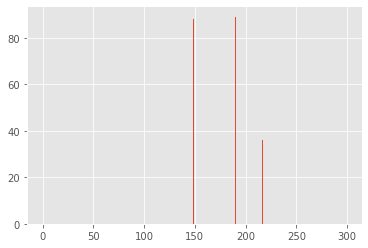

<Figure size 432x288 with 0 Axes>

In [68]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=300, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)

pyplot.show()

plt.savefig("feature_importances")
